In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [8]:
# carregar csv
caminho = '/content/sample_data/train.csv'

# Para ler o arquivo
df = pd.read_csv(caminho)

In [9]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [10]:
df.shape

(800, 22)

In [11]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [12]:
pd.set_option('display.max_columns', None) #função para mostrar todas as colunas do dataframe (df)
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [13]:
df.info() #ver os tipos de dados do df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [14]:
df['age'] = df['age'].astype(int) #mudar o formato da coluna age para int64
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [15]:
# Definindo a lista de colunas ignoradas
numerical_features = ['ID', 'age', 'result']


for col in df.columns:

    if col not in numerical_features:

        print(col, df[col].unique())


        print('-' * 20)


A1_Score [1 0]
--------------------
A2_Score [0 1]
--------------------
A3_Score [1 0]
--------------------
A4_Score [0 1]
--------------------
A5_Score [1 0]
--------------------
A6_Score [0 1]
--------------------
A7_Score [1 0]
--------------------
A8_Score [0 1]
--------------------
A9_Score [1 0]
--------------------
A10_Score [1 0]
--------------------
gender ['f' 'm']
--------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------
jaundice ['no' 'yes']
--------------------
austim ['no' 'yes']
--------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' '

In [16]:
df = df.drop(columns = ['ID', 'age_desc'])

In [17]:
df.shape #confirmar que o drop funcionou

(800, 20)

In [18]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [19]:
mapping = { #corrigir nomes dos países na coluna 'contry_of_res'
"Viet Nam": "Vietnam",
"AmericanSamoa": "United States",
"Hong Kong": "China"
}
df['contry_of_res'] = df['contry_of_res'].replace(mapping)


In [20]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [21]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [22]:
df.describe()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [23]:
sns.set_theme(style = 'darkgrid')

Age mean:  27.96375
Age median:  24.0


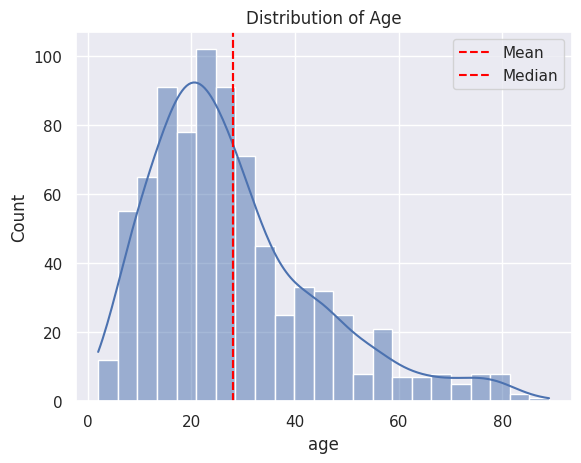

In [24]:
sns.histplot(df['age'], kde =True)
plt.title("Distribution of Age")

age_mean= df['age'].mean()
age_median = df['age'].median()

print("Age mean: ", age_mean)
print("Age median: ", age_median)

plt.axvline(age_mean, color="red", linestyle = "--", label = "Mean")
plt.axvline(age_mean, color="red", linestyle = "--", label = "Median")

plt.legend()
plt.show()


A maioria dos dados está entre 20-30 anos, a assimetria à direita - assimetria positiva - tem pessoas com 80 anos mas ocorrem menos, a média é maior do que a mediana, a linha vermelha perto dos 30 anos indica que pelo menos 50% das pessoas tem 30 anos.

Result mean:  8.537303106501248
Result median:  9.605299308


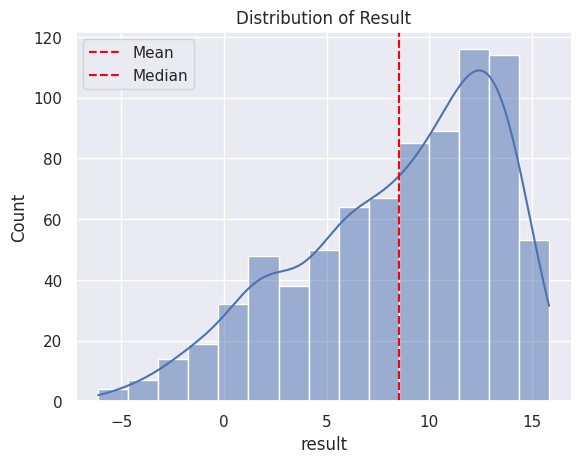

In [25]:
sns.histplot(df['result'], kde =True)
plt.title("Distribution of Result")

result_mean= df['result'].mean()
result_median = df['result'].median()

print("Result mean: ", result_mean)
print("Result median: ", result_median)

plt.axvline(result_mean, color="red", linestyle = "--", label = "Mean")
plt.axvline(result_mean, color="red", linestyle = "--", label = "Median")

plt.legend()
plt.show()


Os dados se concentram entre 10-15, assimetria negativa - para esquerda - média e mediana entre 8-9, notar alguns valores negativos - outliers - fica a dúvida se há correlação entre a idade e o resultado - a idade influencia o resultado?

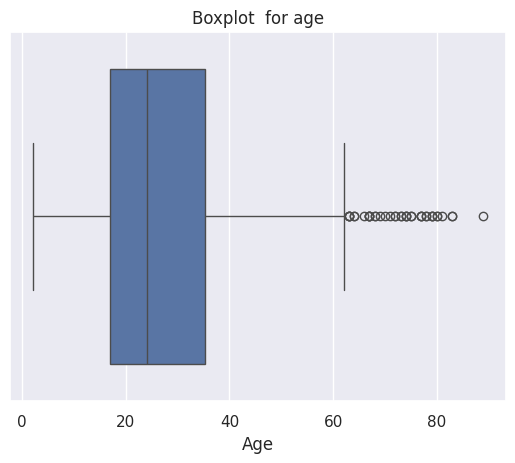

In [26]:
sns.boxplot( x = df['age'])

plt.title("Boxplot  for age")

plt.xlabel("Age")
plt.show()


Presença de outliers em torno de 62 anos; metade dos dados está em torno de 25 anos - mediana, q1 - 18, q3 - 3; aproximadamente 75% dos dados tem em torno de 35 anos

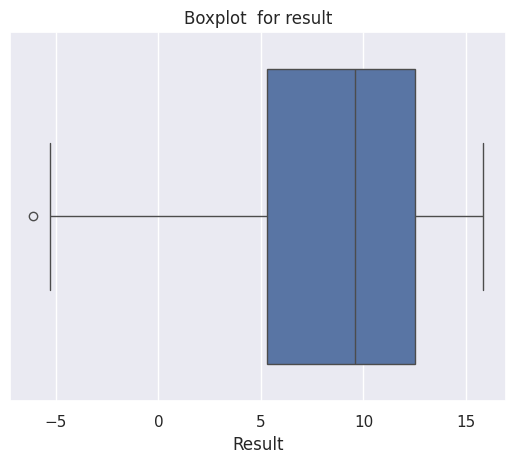

In [27]:
sns.boxplot( x = df['result'])

plt.title("Boxplot  for result")

plt.xlabel("Result")
plt.show()


Outlier com valor nagativo, mediana perto de 10, a maior parte dos dados está entre 5-12

In [28]:
#removendo outliers na coluna age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


age_outliers  = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]



In [29]:
len(age_outliers)

39

In [30]:
print("Lower_bound: ", lower_bound)
print("Upper_bound: ", upper_bound)

Lower_bound:  -10.375
Upper_bound:  62.625


In [31]:
#removendo outliers na coluna result
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


result_outliers  = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [32]:
print("Lower_bound: ", lower_bound)
print("Upper_bound: ", upper_bound)

Lower_bound:  -5.5052896818749995
Upper_bound:  23.326348605125


In [33]:
len(result_outliers)

1

In [34]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

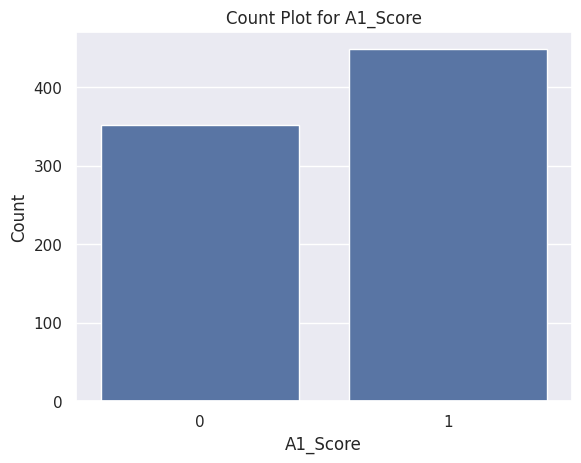

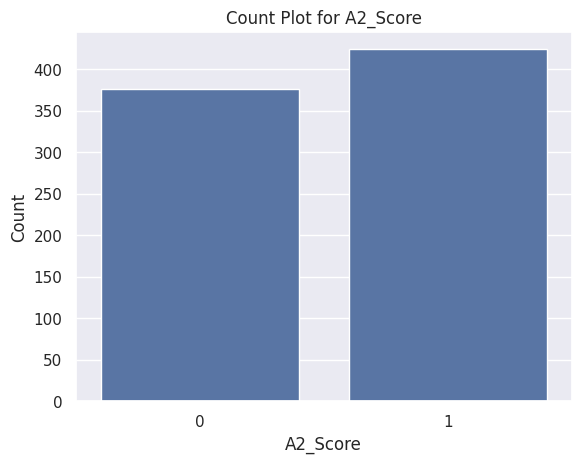

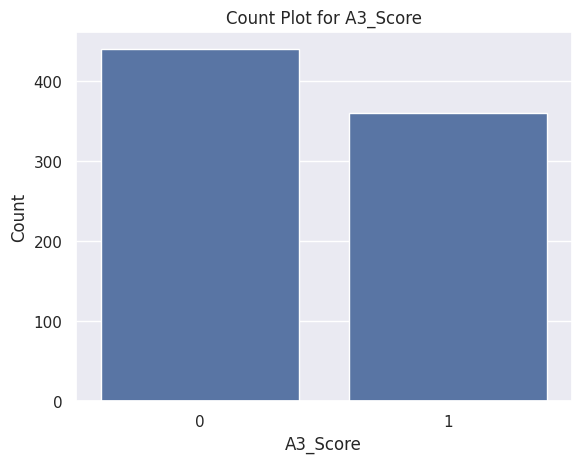

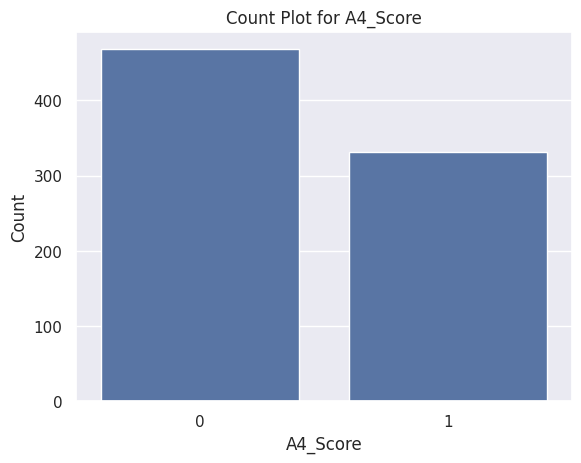

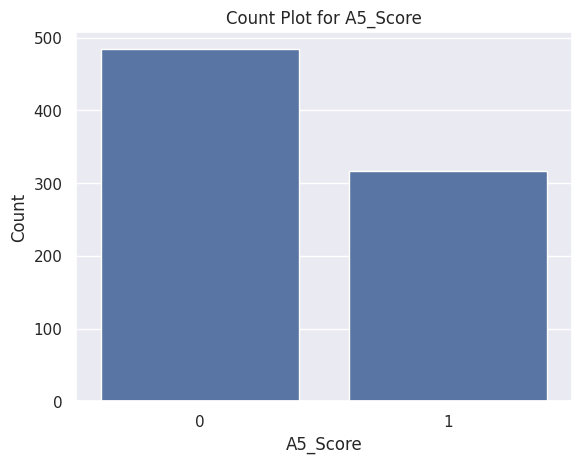

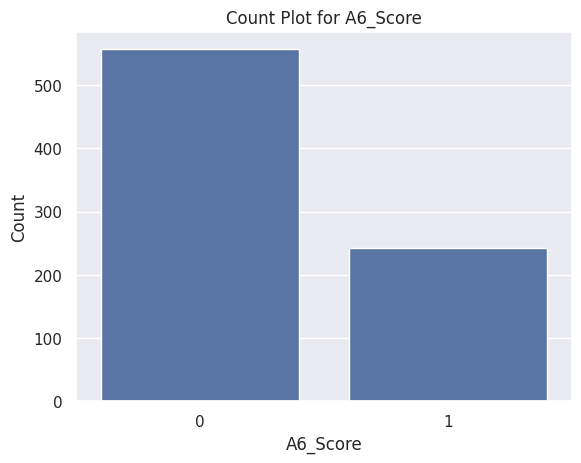

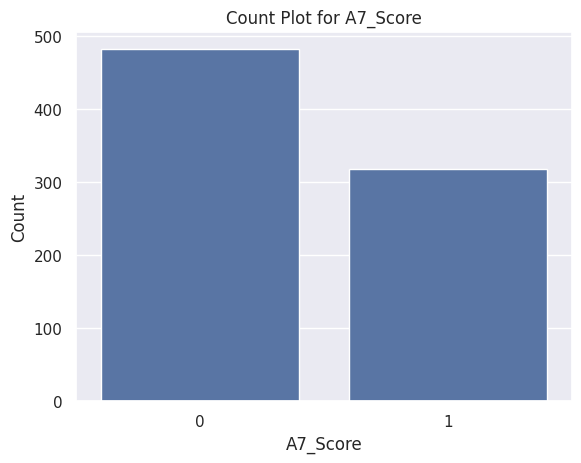

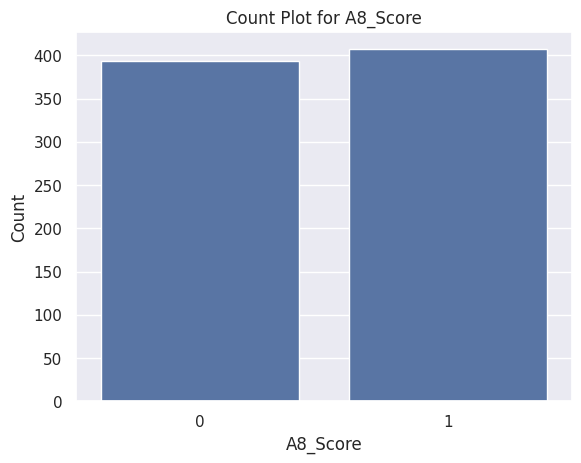

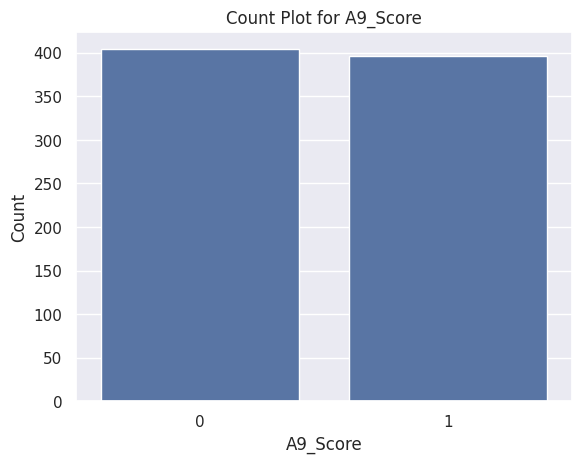

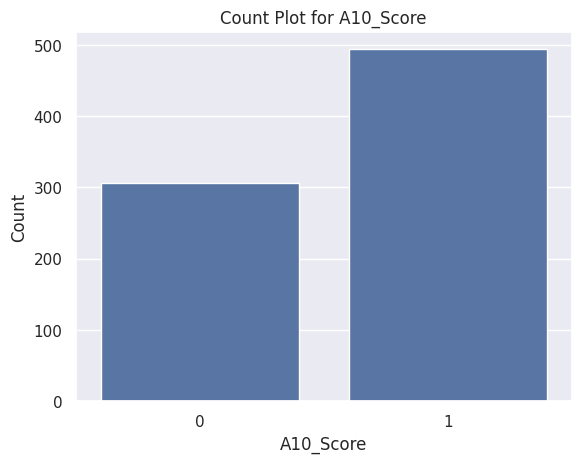

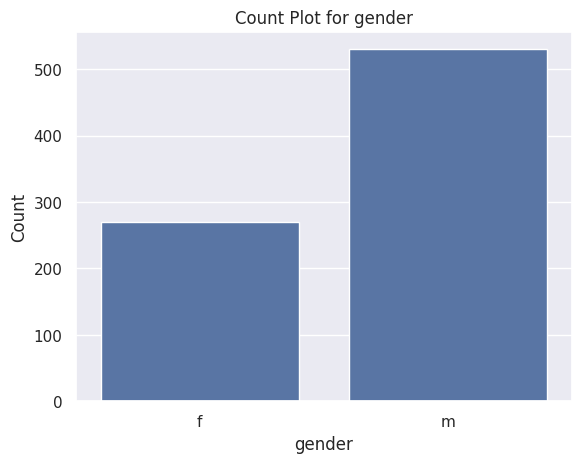

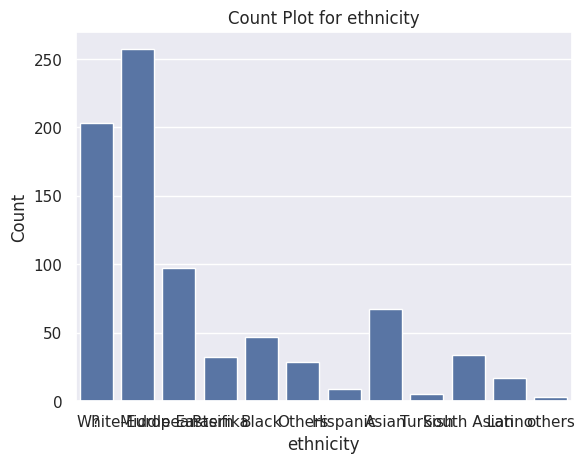

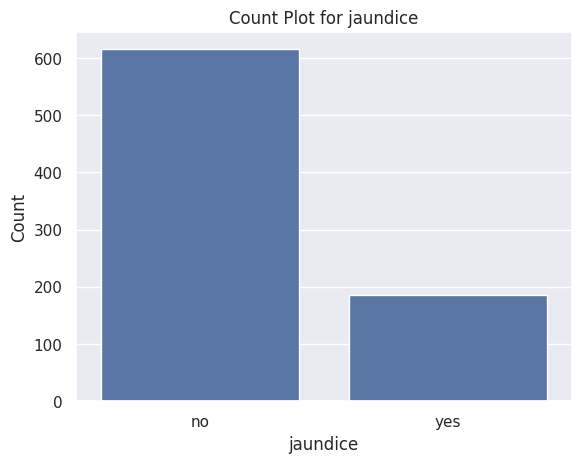

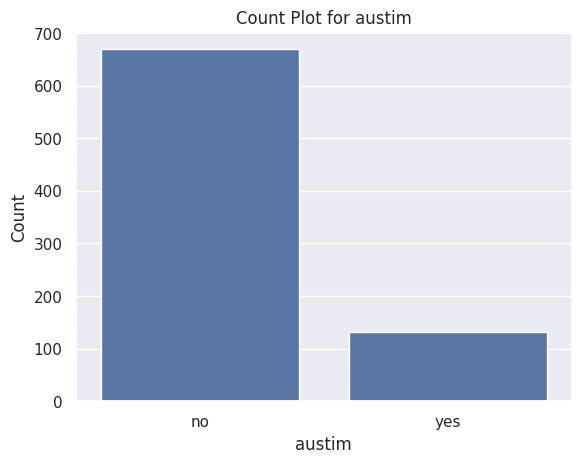

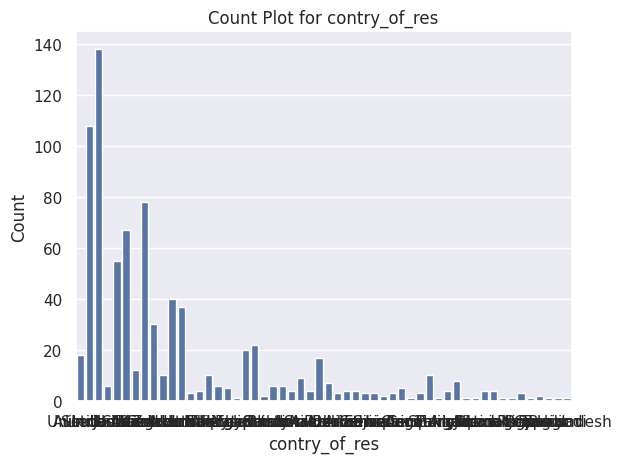

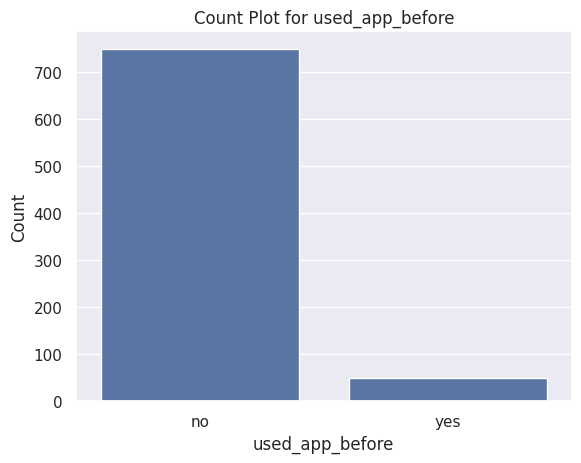

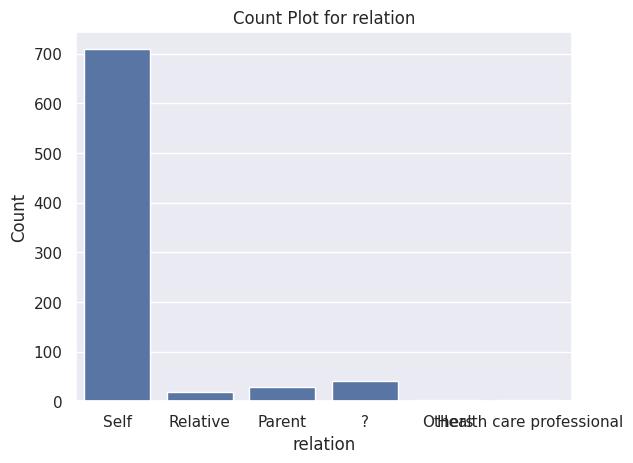

In [35]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


for col in categorical_columns:
    sns.countplot(x = df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

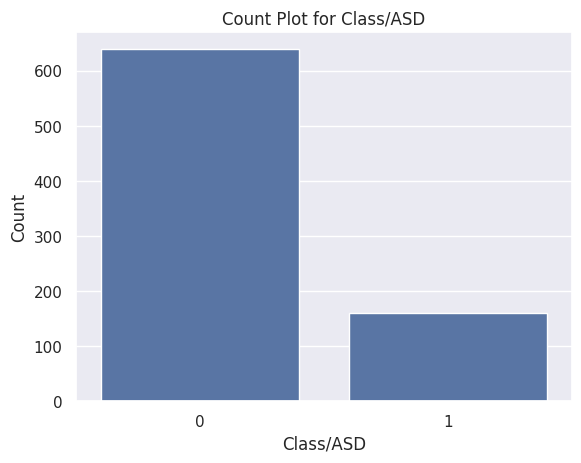

In [36]:
sns.countplot(x = df['Class/ASD'])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [37]:
df['ethnicity'] = df['ethnicity'].replace({'?': 'Others', 'others': 'Others'})

In [38]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [39]:
df['relation'] = df['relation'].replace(
    {
        '?': 'Others',
        'Relative': 'Others',
        'Parent': 'Others',
        'Health care professional': 'Others'
    })

In [40]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [41]:
object_columns = df.select_dtypes(include = ["object"]).columns

In [42]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [43]:
encoders = {}
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

with open("encoders.pkl", "wb") as f:
	  pickle.dump(encoders, f)

In [44]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

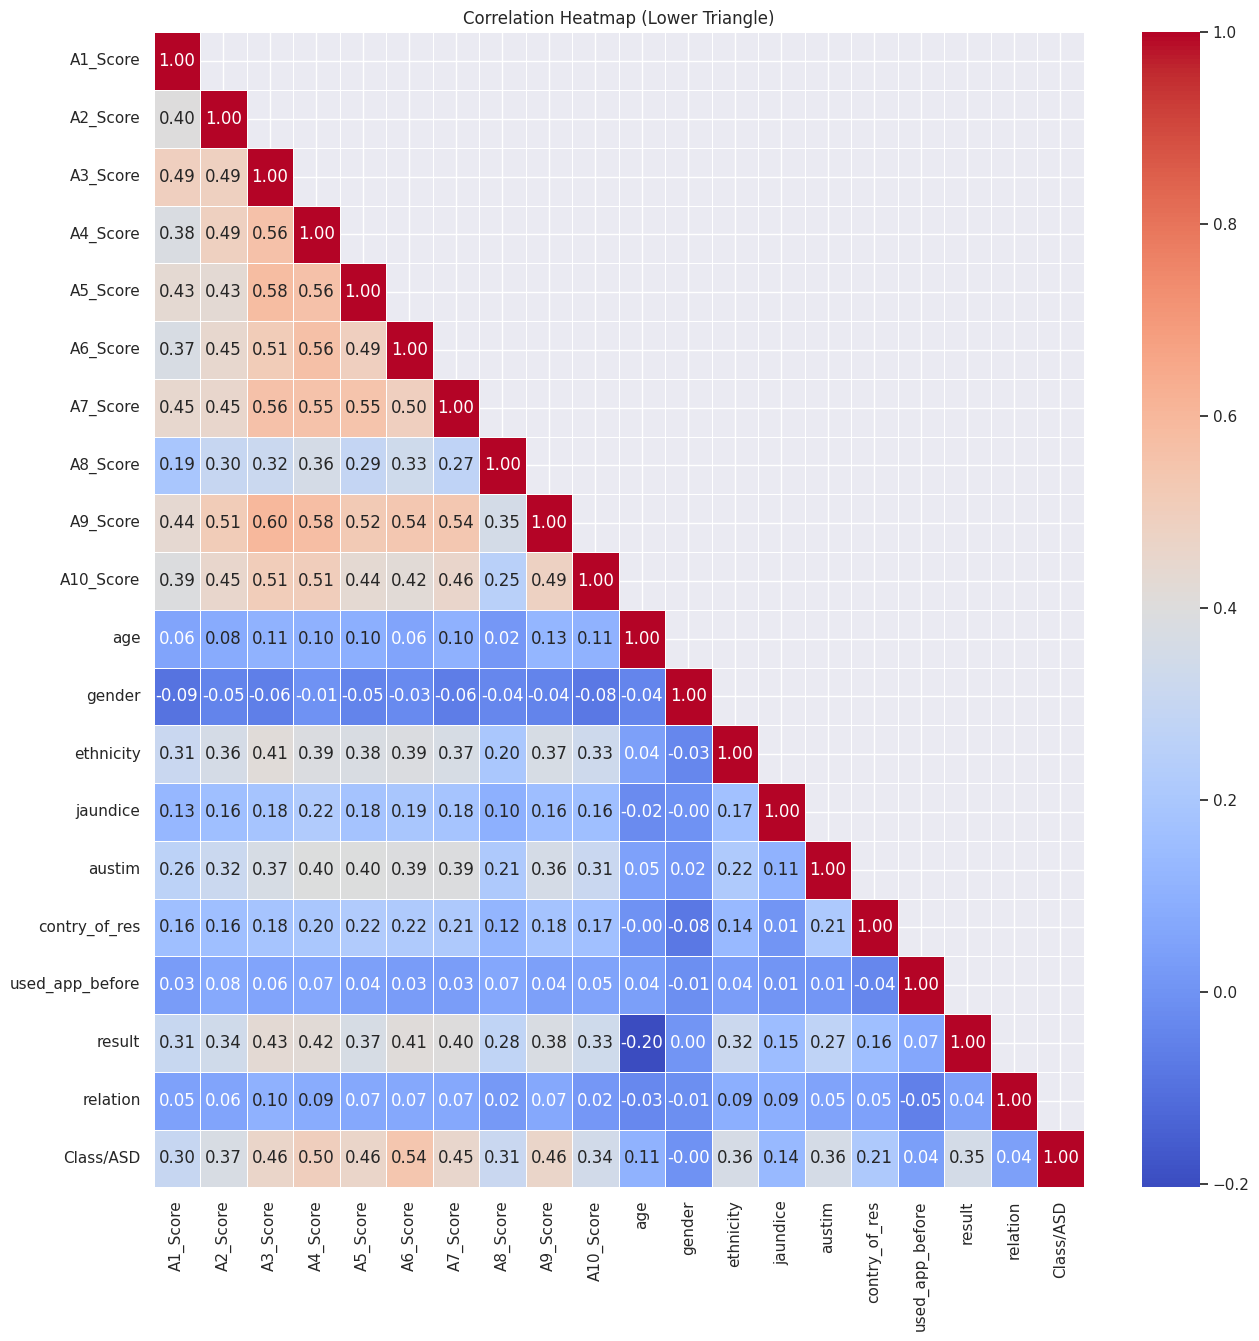

In [46]:
plt.figure(figsize=(15, 15))

#criar mask para esconder a parte de cima do gráfico
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)

#gerar o heatmap com a máscara
sns.heatmap(df.corr(),
            mask=mask,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

Variáveis com baixa correlação: gender e age. Os scores de A1 a A10 têm correlação positiva, ou seja, pessoas que pontuam alto em uma característica tendem a pontuar algo em outras também. Correlação da A3, A4, A6 e A9 com o result, essas perguntas podem ser "mais preditoras" do que as outras para o resultado final. Como os scores A1 a A10 são mto correlacionados, podemos usar os algoritmos Random Forest ou XGBoost

In [47]:
#substituir os outliers pela mediana

def replace_outlier_with_median (df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = df[column].apply(lambda x: median if x <lower_bound or x > upper_bound else x)

    return df

In [48]:
df.shape

(800, 20)

In [49]:
df = replace_outlier_with_median(df, "age")
df = replace_outlier_with_median(df, "result")

In [50]:
df.shape

(800, 20)

In [51]:
X = df.drop(columns = ['Class/ASD'])
y = df['Class/ASD']

In [52]:
#divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
X_train.shape

(640, 19)

In [54]:
y_train.shape

(640,)

In [55]:
y_train.value_counts()


,count
Class/ASD,
0,515
1,125


Com os valores acima - dados estão desbalanceados, muito mais pessoas sem autismo do que com austismo - se treinar o modelo assim pode "viciar" na resposta negativa. Vamos optar por usar a técnica SMOTE - para criar dados sintéticos da classe minoritária e equilibrar esses números para algo próximo de 515 para ambos

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [60]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#verifica os novos números
print("Antes do SMOTE:", y_train.value_counts())
print("Depois do SMOTE:", pd.Series(y_train_resampled).value_counts())

Antes do SMOTE: Class/ASD
0    515
1    125
Name: count, dtype: int64
Depois do SMOTE: Class/ASD
1    515
0    515
Name: count, dtype: int64


In [62]:
y_train_resampled.shape

(1030,)

In [63]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state = 42),
    "RandomForestClassifier": RandomForestClassifier(random_state = 42),
    "XGBClassifier": XGBClassifier(random_state = 42)
}


In [64]:
cv_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters....")
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv = 5, scoring ='accuracy')
    cv_scores [model_name] = scores
    print(f"{model_name} Cross Validation Accuracy: {np.mean(scores): .2f}")
    print("--"*20)

Training DecisionTreeClassifier with default parameters....
DecisionTreeClassifier Cross Validation Accuracy:  0.86
----------------------------------------
Training RandomForestClassifier with default parameters....
RandomForestClassifier Cross Validation Accuracy:  0.92
----------------------------------------
Training XGBClassifier with default parameters....
XGBClassifier Cross Validation Accuracy:  0.90
----------------------------------------


In [65]:
cv_scores

{'DecisionTreeClassifier': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'RandomForestClassifier': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBClassifier': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

In [68]:
decision_tree = DecisionTreeClassifier (random_state=42)
random_forest = RandomForestClassifier (random_state=42)
xgboost_classifier = XGBClassifier (random_state=42)

In [72]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3,5,7,10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [73]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv =5, scoring = "accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv =5, scoring = "accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv =5, scoring = "accuracy", random_state=42)

In [74]:
random_search_dt.fit(X_train_resampled, y_train_resampled)
random_search_rf.fit(X_train_resampled, y_train_resampled)
random_search_xgb.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [75]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_


if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [76]:
best_model

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)

In [77]:
best_score

np.float64(0.9271844660194175)

In [79]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [80]:
y_test_pred = best_model.predict(X_test)

In [81]:
accuracy_score(y_test, y_test_pred)

0.81875

In [82]:
confusion_matrix(y_test, y_test_pred)

array([[108,  16],
       [ 13,  23]])

In [83]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160



In [84]:
#testar um novo paciente com o best_model

# 1. Carregar o modelo salvo
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# 2. Criar dados de um novo paciente
#os dados devem ter as mesmas 19 colunas do X_train
novo_paciente = {
    'A1_Score': 1, 'A2_Score': 1, 'A3_Score': 1, 'A4_Score': 1, 'A5_Score': 0,
    'A6_Score': 1, 'A7_Score': 1, 'A8_Score': 0, 'A9_Score': 1, 'A10_Score': 1,
    'age': 25, 'gender': 1, 'ethnicity': 2, 'jaundice': 0, 'austim': 0,
    'contry_of_res': 5, 'used_app_before': 0, 'result': 8, 'relation': 1
}

df_novo = pd.DataFrame([novo_paciente])

# 3. Fazer a previsão
previsao = loaded_model.predict(df_novo)

if previsao[0] == 1:
    print("Resultado: Indícios de ASD detectados.")
else:
    print("Resultado: Nenhum indício de ASD detectado.")

Resultado: Nenhum indício de ASD detectado.
